To check how robust our model is to unseen data, we can use Validation. It is a technique that involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

The validation set approach

1. Hold Out -- (train test split)
2. k-fold cross-validation
3. Leave one out cross-validation (LOOCV)
4. Stratified k-fold cross-validation

In this section we will learn about stratified k-fold cross-validation. . Let us understand how it works:

* Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.
* For example, in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises about half the instances.
* It is generally a better approach when dealing with both bias and variance.
* A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.


In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train_FE1.csv") 
test=pd.read_csv("test_FE1.csv")
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [3]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [4]:
#Let’s import StratifiedKFold from sklearn and fit the model.

from sklearn.model_selection import StratifiedKFold

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]

n1 of kfold 5
accuracy_score 0.8048780487804879
n2 of kfold 5
accuracy_score 0.8373983739837398
n3 of kfold 5
accuracy_score 0.7804878048780488
n4 of kfold 5
accuracy_score 0.7886178861788617
n5 of kfold 5
accuracy_score 0.7950819672131147


In [12]:
pd.DataFrame(pred_test).value_counts()

1    303
0     64
dtype: int64

### The mean validation accuracy for this model turns out to be 0.81. Let us visualize the roc curve.

auc 0.7349624060150376


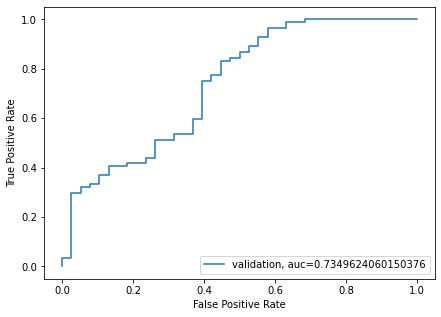

In [17]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred) 
print("auc",auc)
plt.figure(figsize=(7,5)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [19]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

From this submission, we got an accuracy of 0.78472 on the leaderboard. Now we will try to improve this accuracy using different approaches.

In [11]:
for value in kf.split(X,y):
    print(value)

(array([  0,   1,   2,   4,   6,   8,   9,  10,  11,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  32,  33,  34,
        35,  37,  38,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,
        64,  65,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  84,  86,  87,  88,  90,  91,  92,  93,  94,
        95,  97,  99, 100, 102, 103, 105, 106, 107, 108, 111, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 158,
       160, 162, 163, 164, 166, 167, 168, 169, 170, 171, 173, 174, 175,
       176, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 190, 191,
       192, 193, 195, 196, 197, 199, 201, 202, 203, 204, 205, 206, 207,
       210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 2